In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
laptop = pd.read_csv('D:/classes/data science/homework/Laptops.csv',
    thousands=',', sep=None,engine='python')

In [49]:
laptop.head()

,Title,Prices,Ratings
0,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990,4.4
1,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,53990,4.4
2,MSI Katana GF66 Core i7 11th Gen - (16 GB/512 ...,79990,4.3
3,Lenovo IdeaPad Ryzen 5 Hexa Core 5600H - (8 GB...,49990,4.4
4,HP Victus Ryzen 5 Hexa Core 5600H - (8 GB/512 ...,57990,4.2


In [50]:
#extracting model and specs from Title

laptop['model'],laptop['specs'] = laptop['Title'].str.split('-',1).str
del laptop['Title']
laptop.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14620\1806219969.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop['model'],laptop['specs'] = laptop['Title'].str.split('-',1).str


,Prices,Ratings,model,specs
0,49990,4.4,ASUS TUF Gaming F15 Core i5 10th Gen,(8 GB/512 GB SSD...
1,53990,4.4,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,NaN
2,79990,4.3,MSI Katana GF66 Core i7 11th Gen,(16 GB/512 GB SSD/Wi...
3,49990,4.4,Lenovo IdeaPad Ryzen 5 Hexa Core 5600H,(8 GB/512 GB S...
4,57990,4.2,HP Victus Ryzen 5 Hexa Core 5600H,(8 GB/512 GB SSD/Wi...


In [51]:
#Extracting RAM from specs

laptop['RAM'],laptop['HDD'] = laptop['specs'].str.split('(',1).str
del laptop['specs']
laptop.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14620\4247255151.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop['RAM'],laptop['HDD'] = laptop['specs'].str.split('(',1).str


,Prices,Ratings,model,RAM,HDD
0,49990,4.4,ASUS TUF Gaming F15 Core i5 10th Gen,,8 GB/512 GB SSD...
1,53990,4.4,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,NaN,NaN
2,79990,4.3,MSI Katana GF66 Core i7 11th Gen,,16 GB/512 GB SSD/Wi...
3,49990,4.4,Lenovo IdeaPad Ryzen 5 Hexa Core 5600H,,8 GB/512 GB S...
4,57990,4.2,HP Victus Ryzen 5 Hexa Core 5600H,,8 GB/512 GB SSD/Wi...


In [52]:

laptop['RAM'],laptop['Storage'] = laptop['HDD'].str.split('/',1).str
del laptop['HDD']
laptop.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14620\270214023.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop['RAM'],laptop['Storage'] = laptop['HDD'].str.split('/',1).str


,Prices,Ratings,model,RAM,Storage
0,49990,4.4,ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD...
1,53990,4.4,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,NaN,NaN
2,79990,4.3,MSI Katana GF66 Core i7 11th Gen,16 GB,512 GB SSD/Wi...
3,49990,4.4,Lenovo IdeaPad Ryzen 5 Hexa Core 5600H,8 GB,512 GB S...
4,57990,4.2,HP Victus Ryzen 5 Hexa Core 5600H,8 GB,512 GB SSD/Wi...


In [53]:
laptop.rename(columns={'Prices': 'Model_Price', 'Ratings':'Product_Rating','model':'Product_Name'},inplace=True)
laptop.head()

,Model_Price,Product_Rating,Product_Name,RAM,Storage
0,49990,4.4,ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD...
1,53990,4.4,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,NaN,NaN
2,79990,4.3,MSI Katana GF66 Core i7 11th Gen,16 GB,512 GB SSD/Wi...
3,49990,4.4,Lenovo IdeaPad Ryzen 5 Hexa Core 5600H,8 GB,512 GB S...
4,57990,4.2,HP Victus Ryzen 5 Hexa Core 5600H,8 GB,512 GB SSD/Wi...


In [28]:
laptop.isnull().sum()

Model_Price        0
Product_Rating     4
Product_Name       0
RAM               10
Storage           12
dtype: int64

In [54]:
#deleting all the rows with NaN
laptop = laptop.dropna()

In [55]:
laptop.describe()

,Model_Price,Product_Rating
count,24.000000,24.000000
mean,73269.625000,4.429167
std,24231.017633,0.192194
min,49990.000000,4.200000
25%,54490.000000,4.300000
50%,64990.000000,4.400000
75%,81167.750000,4.500000
max,139990.000000,5.000000


In [56]:
first_col = laptop.pop('Product_Name')
laptop.insert(0, 'Product_Name', first_col)
laptop.head()

sec_col = laptop.pop('RAM')
laptop.insert(1, 'RAM', sec_col)
laptop.head()

third_col = laptop.pop('Storage')
laptop.insert(2, 'Storage', third_col)
laptop.head()

,Product_Name,RAM,Storage,Model_Price,Product_Rating
0,ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD...,49990,4.4
2,MSI Katana GF66 Core i7 11th Gen,16 GB,512 GB SSD/Wi...,79990,4.3
3,Lenovo IdeaPad Ryzen 5 Hexa Core 5600H,8 GB,512 GB S...,49990,4.4
4,HP Victus Ryzen 5 Hexa Core 5600H,8 GB,512 GB SSD/Wi...,57990,4.2
5,Lenovo IdeaPad Gaming Core i5 11th Gen,8 GB,512 GB S...,50990,4.3


SORTING MY MOST EXPENSIVE

In [57]:
laptop.sort_values(['Model_Price'], ascending=[False])


,Product_Name,RAM,Storage,Model_Price,Product_Rating
15,Lenovo Legion 5 Pro Ryzen 7 Octa Core 5800H,16 GB,1 ...,139990,4.7
13,MSI Core i9 12th Gen,16 GB,1 TB SSD/Windows 11 Home/...,119990,4.5
7,HP OMEN Ryzen 7 Octa Core AMD R7,16 GB,512 GB ...,109990,4.4
33,DELL Ryzen 7 Octa Core AMD R7,16 GB,512 GB SSD...,99990,5.0
20,ASUS TUF Dash F15 Core i7 12th Gen,16 GB,1 TB SSD/Wi...,95990,4.4
26,DELL G15 Core i5 12th Gen,16 GB,512 GB SSD/Windows 1...,84701,4.2
2,MSI Katana GF66 Core i7 11th Gen,16 GB,512 GB SSD/Wi...,79990,4.3
11,HP OMEN Ryzen 5 Hexa Core AMD R5,8 GB,512 GB S...,77990,4.8
17,MSI Katana GF66 Core i5 12th Gen,16 GB,512 GB SSD/Wi...,76990,4.6
24,HP Victus Ryzen 7 Octa Core 5800H,8 GB,512 GB SSD/Wi...,69990,4.3


SORTING BY HIGHEST AVERAGE REVIEW

In [58]:
laptop.sort_values(['Product_Rating'], ascending=[False])


,Product_Name,RAM,Storage,Model_Price,Product_Rating
33,DELL Ryzen 7 Octa Core AMD R7,16 GB,512 GB SSD...,99990,5.0
11,HP OMEN Ryzen 5 Hexa Core AMD R5,8 GB,512 GB S...,77990,4.8
15,Lenovo Legion 5 Pro Ryzen 7 Octa Core 5800H,16 GB,1 ...,139990,4.7
14,HP Victus Intel Core i5 11th Gen,16 GB,512 GB SSD/Wi...,65990,4.6
17,MSI Katana GF66 Core i5 12th Gen,16 GB,512 GB SSD/Wi...,76990,4.6
18,ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD...,54990,4.5
13,MSI Core i9 12th Gen,16 GB,1 TB SSD/Windows 11 Home/...,119990,4.5
7,HP OMEN Ryzen 7 Octa Core AMD R7,16 GB,512 GB ...,109990,4.4
28,MSI Core i5 11th Gen,8 GB,512 GB SSD/Windows 10 Home...,52990,4.4
22,acer Aspire 7 Ryzen 5 Hexa Core AMD R5,8 GB,51...,52990,4.4


LAPTOPS CHEAPER THAN Rs 50,000

In [59]:
laptop[laptop.Model_Price <= 50000]

,Product_Name,RAM,Storage,Model_Price,Product_Rating
0,ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD...,49990,4.4
3,Lenovo IdeaPad Ryzen 5 Hexa Core 5600H,8 GB,512 GB S...,49990,4.4


LAPTOP PRICE BETWEEN 60k - 100k with AVERAGE RATING 4.6 or HIGHER

In [60]:
laptop[(laptop['Model_Price'] >= 60000) & (laptop['Model_Price'] <= 100000) & (laptop['Product_Rating'] >= 4.6)]

,Product_Name,RAM,Storage,Model_Price,Product_Rating
11,HP OMEN Ryzen 5 Hexa Core AMD R5,8 GB,512 GB S...,77990,4.8
14,HP Victus Intel Core i5 11th Gen,16 GB,512 GB SSD/Wi...,65990,4.6
17,MSI Katana GF66 Core i5 12th Gen,16 GB,512 GB SSD/Wi...,76990,4.6
33,DELL Ryzen 7 Octa Core AMD R7,16 GB,512 GB SSD...,99990,5.0


VISUALIZATION

Text(0.5, 1.0, 'Price vs Rating')

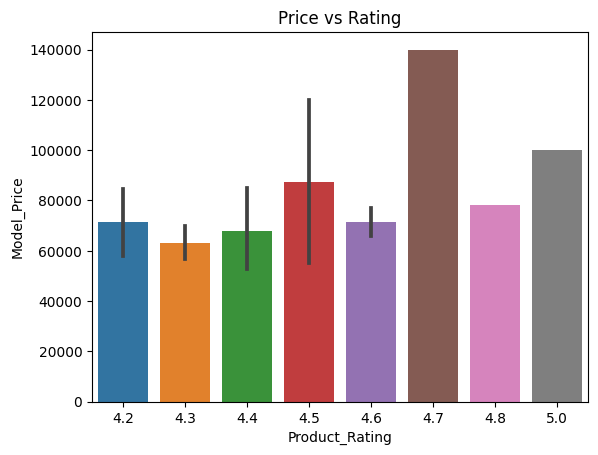

In [61]:
sns.barplot(data = laptop, x='Product_Rating', y='Model_Price')
plt.title("Price vs Rating")

We can see product with higher price have somehow higher ratings from the above bar graph

Text(0.5, 1.0, 'Boxplot for Price')

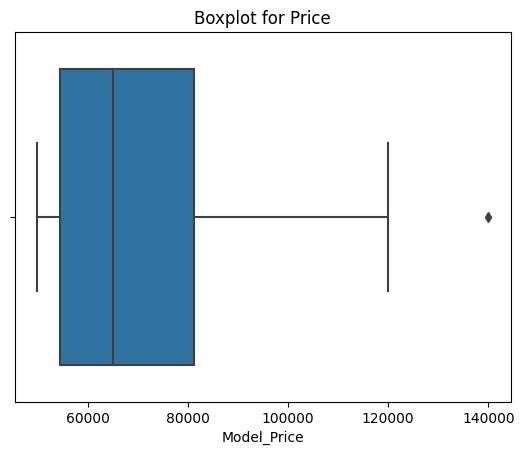

In [62]:
sns.boxplot(x=laptop['Model_Price'])
plt.title("Boxplot for Price")

We can see there are more laptops in range of 60-80k targetting the mid range communitites